In [1]:
import tensorflow as tf
import os
from utils import *
from tacotron import Tacotron
from tqdm import tqdm

In [2]:
paths, lengths, texts, raw_texts = [], [], [], []
text_files = [f for f in os.listdir('mel') if f.endswith('.npy')]
for fpath in text_files:
    with open('%s/%s' % (path, fpath.replace('npy', 'txt'))) as fopen:
        text = fopen.read()
    paths.append(fpath.replace('.npy', ''))
    text = text_normalize(text)
    raw_texts.append(text)
    text = text + 'E'
    texts.append(np.array([char2idx[char] for char in text], np.int32))
    lengths.append(len(text))

In [3]:
paths[:2], lengths[:2], texts[:2]

(['OAF_mop_fear', 'OAF_ripe_neutral'],
 [17, 18],
 [array([22,  4, 28,  3, 23, 11,  8,  3, 26, 18, 21,  7,  3, 16, 18, 19,  2],
        dtype=int32),
  array([22,  4, 28,  3, 23, 11,  8,  3, 26, 18, 21,  7,  3, 21, 12, 19,  8,
          2], dtype=int32)])

In [4]:
def dynamic_batching(paths):
    files, max_y, max_z = [], 0, 0
    for n in range(len(paths)):
        files.append(get_cached(paths[n]))
        if files[-1][0].shape[0] > max_y:
            max_y = files[-1][0].shape[0]
        if files[-1][1].shape[0] > max_z:
            max_z = files[-1][1].shape[0]
    return files, max_y, max_z

In [5]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = Tacotron()
sess.run(tf.global_variables_initializer())

minibatch loop: 100%|██████████| 88/88 [01:05<00:00,  1.46it/s, cost=1.49, loss1=0.0462, loss2=0.0282, loss_att=0.00214, loss_bd1=0.71, loss_bd2=0.702] 


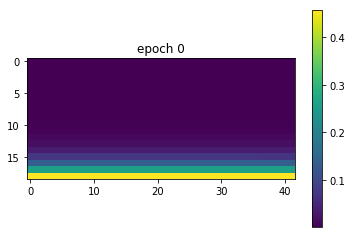

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.43it/s, cost=1.47, loss1=0.036, loss2=0.0243, loss_att=0.00212, loss_bd1=0.71, loss_bd2=0.702]  


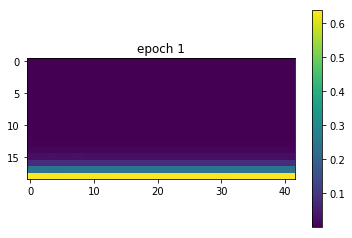

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.44it/s, cost=1.47, loss1=0.0318, loss2=0.0225, loss_att=0.00212, loss_bd1=0.709, loss_bd2=0.703]


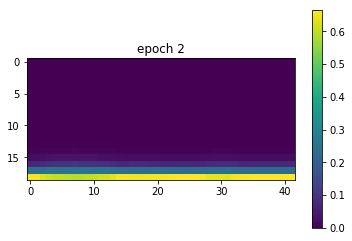

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.45it/s, cost=1.46, loss1=0.0289, loss2=0.0214, loss_att=0.002, loss_bd1=0.709, loss_bd2=0.703]  


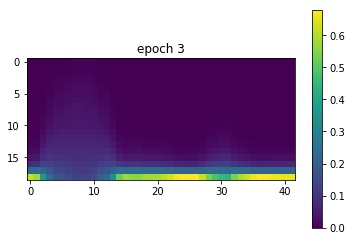

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.45it/s, cost=1.46, loss1=0.0279, loss2=0.0224, loss_att=0.00176, loss_bd1=0.707, loss_bd2=0.702]


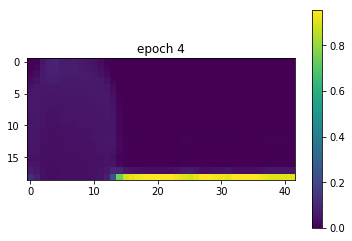

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.46it/s, cost=1.46, loss1=0.0276, loss2=0.0207, loss_att=0.00282, loss_bd1=0.708, loss_bd2=0.703] 


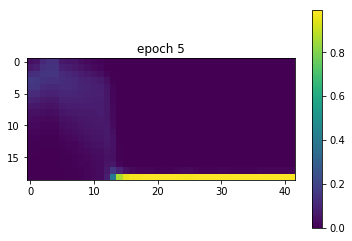

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.45it/s, cost=1.46, loss1=0.0279, loss2=0.0202, loss_att=0.00139, loss_bd1=0.708, loss_bd2=0.702] 


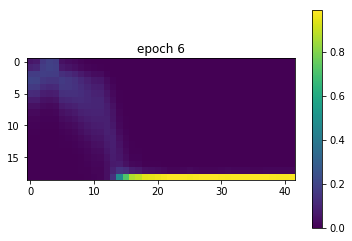

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.45it/s, cost=1.46, loss1=0.0258, loss2=0.0192, loss_att=0.0015, loss_bd1=0.708, loss_bd2=0.703]  


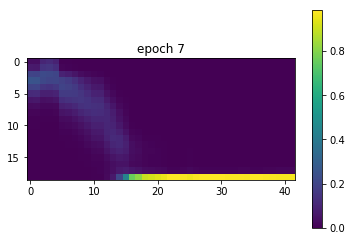

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.47it/s, cost=1.46, loss1=0.0248, loss2=0.0194, loss_att=0.00155, loss_bd1=0.708, loss_bd2=0.703] 


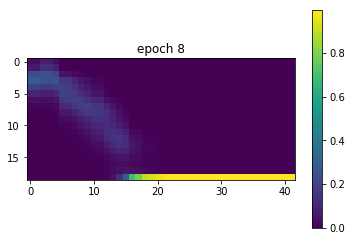

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.46it/s, cost=1.45, loss1=0.0242, loss2=0.019, loss_att=0.00156, loss_bd1=0.707, loss_bd2=0.702]  


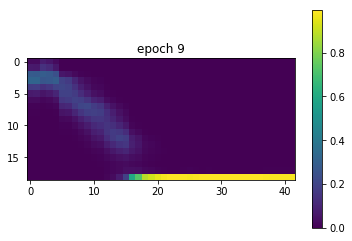

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.44it/s, cost=1.45, loss1=0.0236, loss2=0.0186, loss_att=0.00156, loss_bd1=0.707, loss_bd2=0.702] 


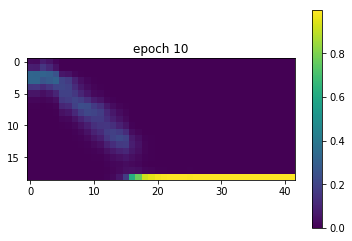

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.46it/s, cost=1.45, loss1=0.0232, loss2=0.0184, loss_att=0.0016, loss_bd1=0.707, loss_bd2=0.702]  


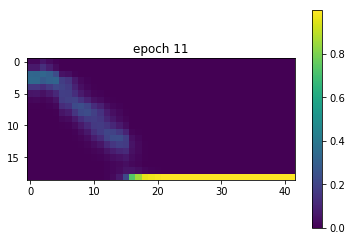

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.45it/s, cost=1.45, loss1=0.0242, loss2=0.0181, loss_att=0.00152, loss_bd1=0.707, loss_bd2=0.702] 


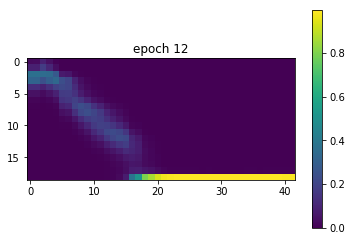

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.48it/s, cost=1.45, loss1=0.0235, loss2=0.0206, loss_att=0.00156, loss_bd1=0.707, loss_bd2=0.702] 


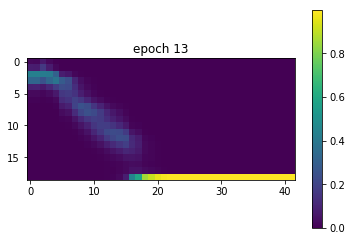

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.48it/s, cost=1.45, loss1=0.023, loss2=0.0184, loss_att=0.00156, loss_bd1=0.707, loss_bd2=0.702]  


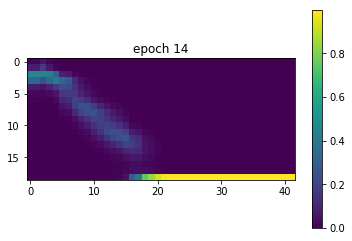

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.45it/s, cost=1.45, loss1=0.0228, loss2=0.018, loss_att=0.00157, loss_bd1=0.707, loss_bd2=0.702]  


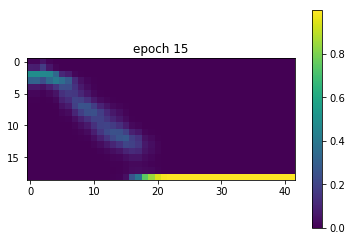

minibatch loop: 100%|██████████| 88/88 [01:00<00:00,  1.46it/s, cost=1.45, loss1=0.0223, loss2=0.0181, loss_att=0.00156, loss_bd1=0.707, loss_bd2=0.702] 


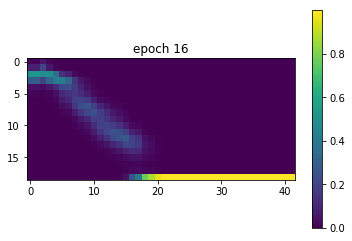

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.47it/s, cost=1.45, loss1=0.0213, loss2=0.0178, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.702] 


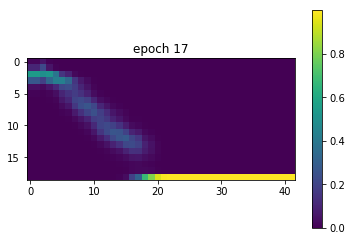

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.48it/s, cost=1.45, loss1=0.0212, loss2=0.018, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.702]  


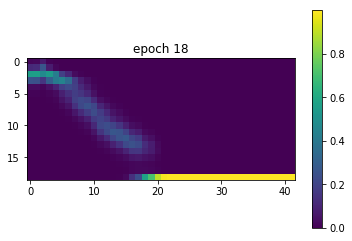

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.47it/s, cost=1.45, loss1=0.0208, loss2=0.0182, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.702] 


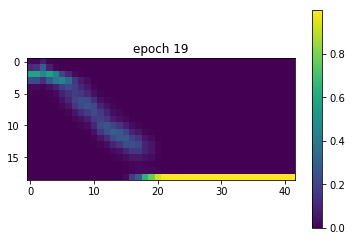

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.46it/s, cost=1.45, loss1=0.0209, loss2=0.0175, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.702] 


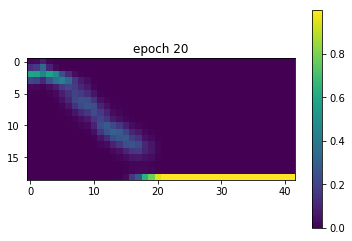

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.45it/s, cost=1.45, loss1=0.0206, loss2=0.018, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.702]  


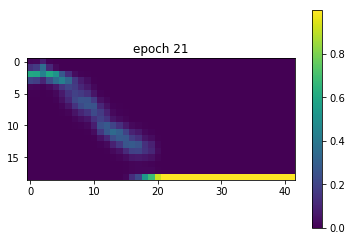

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.45it/s, cost=1.45, loss1=0.0205, loss2=0.0175, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.702] 


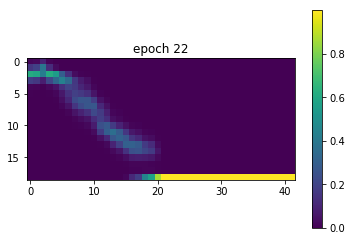

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.45it/s, cost=1.45, loss1=0.0204, loss2=0.0171, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.702] 


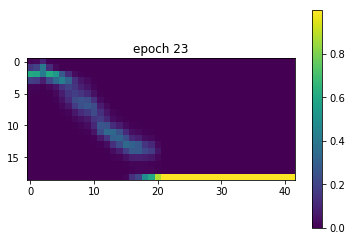

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.45it/s, cost=1.45, loss1=0.0201, loss2=0.0171, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.702] 


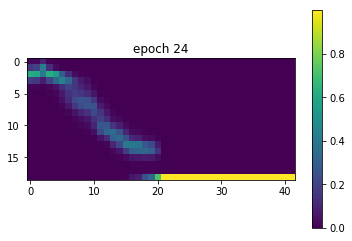

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.46it/s, cost=1.45, loss1=0.0206, loss2=0.0173, loss_att=0.00157, loss_bd1=0.707, loss_bd2=0.702] 


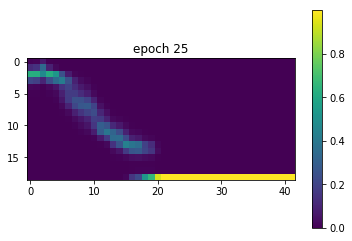

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.45it/s, cost=1.52, loss1=0.0201, loss2=0.0886, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.707] 


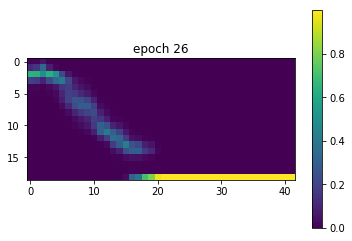

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.43it/s, cost=1.46, loss1=0.0201, loss2=0.0311, loss_att=0.00158, loss_bd1=0.707, loss_bd2=0.703] 


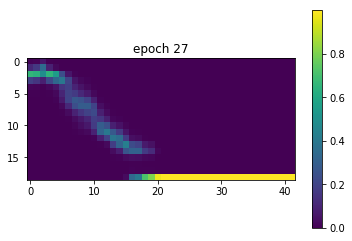

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.47it/s, cost=1.46, loss1=0.0196, loss2=0.0282, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.703] 


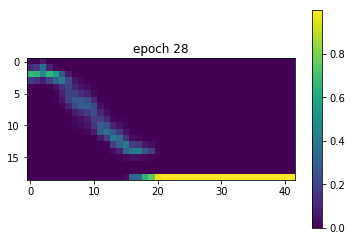

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.43it/s, cost=1.46, loss1=0.0198, loss2=0.0284, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.702] 


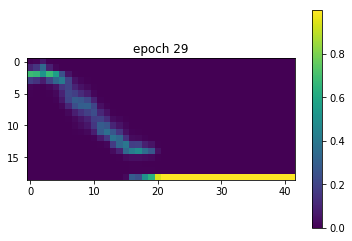

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.47it/s, cost=1.46, loss1=0.0193, loss2=0.0268, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.703] 


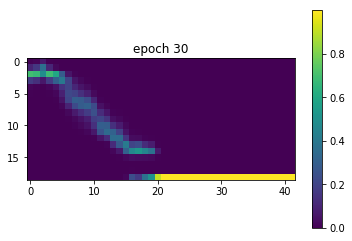

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.44it/s, cost=1.46, loss1=0.0194, loss2=0.0262, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.702] 


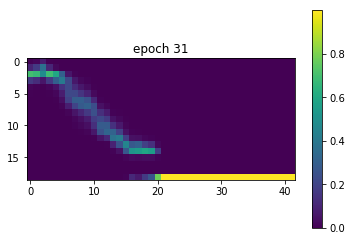

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.46it/s, cost=1.46, loss1=0.019, loss2=0.0261, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.702]  


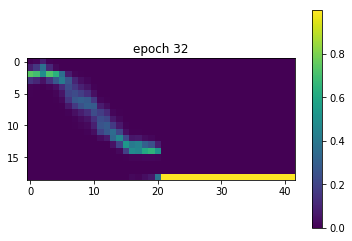

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.45it/s, cost=1.46, loss1=0.0192, loss2=0.0256, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.702] 


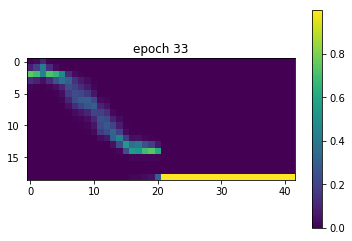

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.48it/s, cost=1.46, loss1=0.019, loss2=0.0246, loss_att=0.00158, loss_bd1=0.708, loss_bd2=0.703]  


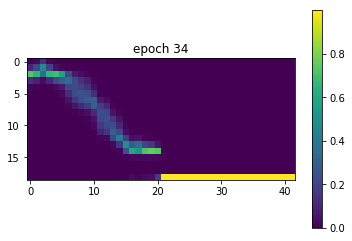

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.46it/s, cost=1.46, loss1=0.0195, loss2=0.0245, loss_att=0.00157, loss_bd1=0.707, loss_bd2=0.703] 


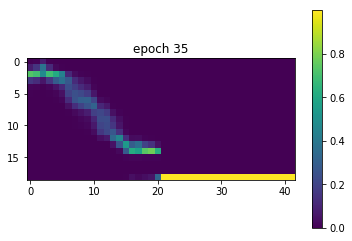

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.46it/s, cost=1.46, loss1=0.0194, loss2=0.0247, loss_att=0.00158, loss_bd1=0.708, loss_bd2=0.702] 


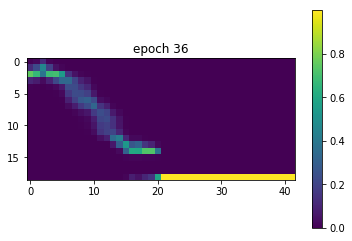

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.46it/s, cost=1.46, loss1=0.0186, loss2=0.0239, loss_att=0.00158, loss_bd1=0.708, loss_bd2=0.703] 


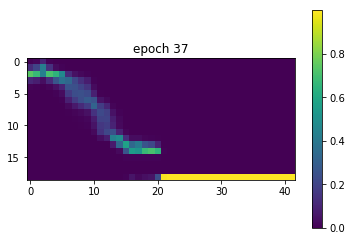

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.44it/s, cost=1.46, loss1=0.0178, loss2=0.0241, loss_att=0.00157, loss_bd1=0.709, loss_bd2=0.703] 


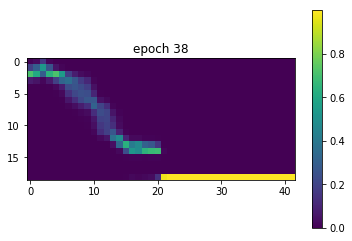

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.49it/s, cost=1.45, loss1=0.0178, loss2=0.0236, loss_att=0.00157, loss_bd1=0.709, loss_bd2=0.703] 


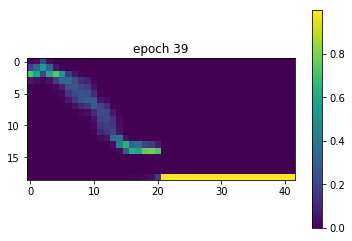

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.45it/s, cost=1.45, loss1=0.0177, loss2=0.0239, loss_att=0.00157, loss_bd1=0.709, loss_bd2=0.702] 


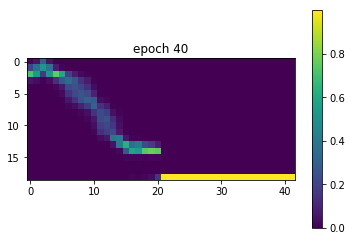

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.46it/s, cost=1.45, loss1=0.0176, loss2=0.0233, loss_att=0.00157, loss_bd1=0.709, loss_bd2=0.703] 


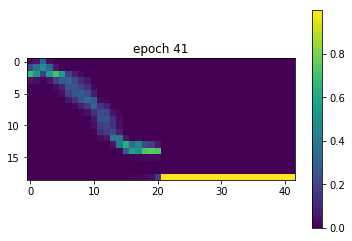

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.46it/s, cost=1.45, loss1=0.0176, loss2=0.0235, loss_att=0.00157, loss_bd1=0.709, loss_bd2=0.702] 


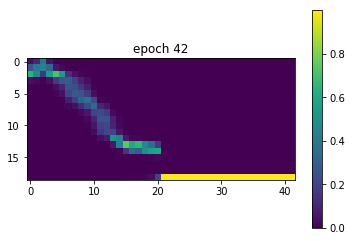

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.45it/s, cost=1.45, loss1=0.0176, loss2=0.0232, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.703] 


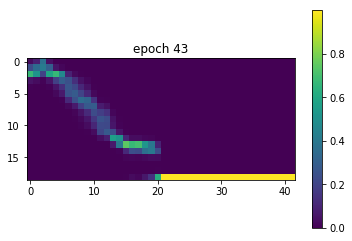

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.46it/s, cost=1.45, loss1=0.0181, loss2=0.0232, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.702] 


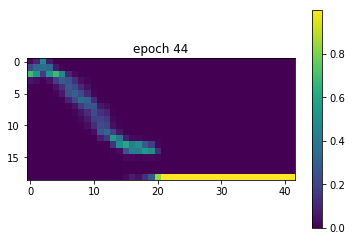

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.45it/s, cost=1.45, loss1=0.018, loss2=0.0228, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.702]  


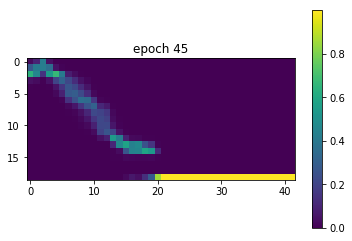

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.45it/s, cost=1.45, loss1=0.0183, loss2=0.0226, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.703] 


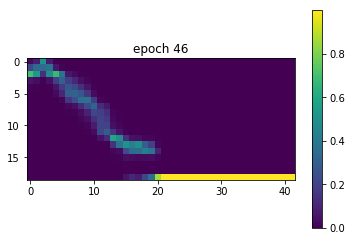

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.46it/s, cost=1.45, loss1=0.0183, loss2=0.0228, loss_att=0.00157, loss_bd1=0.708, loss_bd2=0.702] 


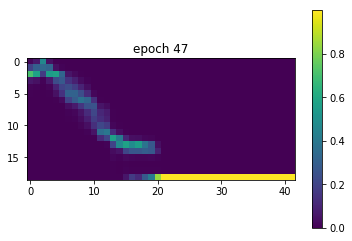

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.46it/s, cost=1.45, loss1=0.0187, loss2=0.0227, loss_att=0.00157, loss_bd1=0.707, loss_bd2=0.702] 


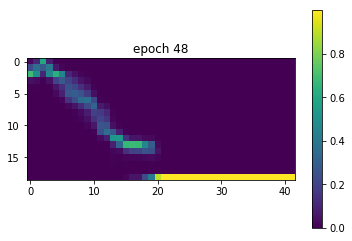

minibatch loop: 100%|██████████| 88/88 [01:01<00:00,  1.48it/s, cost=1.45, loss1=0.0191, loss2=0.0223, loss_att=0.00157, loss_bd1=0.707, loss_bd2=0.703] 


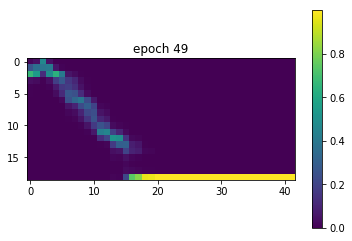

In [6]:
EPOCH = 50
for i in range(EPOCH):
    pbar = tqdm(range(0, len(paths), batch_size), desc = 'minibatch loop')
    for k in pbar:
        index = min(k + batch_size, len(paths))
        files, max_y, max_z = dynamic_batching(paths[k:index])
        max_x = max(lengths[k:index])
        batch_x = np.zeros((batch_size, max_x))
        batch_y = np.zeros((batch_size, max_y, n_mels * resampled))
        batch_z = np.zeros((batch_size, max_z, fourier_window_size // 2 + 1))
        for n in range(len(files)):
            batch_x[n, :] = np.pad(
                texts[k + n],
                ((0, max_x - texts[k + n].shape[0])),
                mode = 'constant',
            )
            batch_y[n, :, :] = np.pad(
                files[n][0],
                ((0, max_y - files[n][0].shape[0]), (0, 0)),
                mode = 'constant',
            )
            batch_z[n, :, :] = np.pad(
                files[n][1],
                ((0, max_z - files[n][1].shape[0]), (0, 0)),
                mode = 'constant',
            )
        _, cost, loss1, loss2, loss_bd1, loss_att, loss_bd2 = sess.run(
            [model.optimizer, model.loss, 
            model.loss1, model.loss2, model.loss_bd1,
            model.loss_att, model.loss_bd2],
            feed_dict = {model.X: batch_x, model.Y: batch_y, model.Z: batch_z},
        )
        pbar.set_postfix(cost = cost, loss1 = loss1, loss2 = loss2, loss_bd1 = loss_bd1,
                        loss_att = loss_att, loss_bd2 = loss_bd2)
        
    align = sess.run(
        model.alignments, feed_dict = {model.X: batch_x, model.Y: batch_y}
    )
    plot_alignment(align[0, :, :], i)

In [7]:
y_hat = np.ones((1, batch_y.shape[1], n_mels * resampled), np.float32)
for j in tqdm(range(batch_y.shape[1])):
    _y_hat = sess.run(model.Y_hat, {model.X: [texts[0]], model.Y: y_hat})
    y_hat[:, j, :] = _y_hat[:, j, :]

100%|██████████| 42/42 [00:03<00:00, 10.75it/s]


In [8]:
mags = sess.run(model.Z_hat, {model.Y: y_hat})

In [9]:
audio = spectrogram2wav(mags[0])

In [10]:
import IPython.display as ipd
ipd.Audio(audio, rate = sample_rate)

In [11]:
from scipy.io.wavfile import write
print('saving: %s'%(raw_texts[0]))
write(os.path.join('test-tacotron.wav'), sample_rate, audio)

saving: say the word mop


In [12]:
mags = sess.run(model.Z_hat, {model.Y: [batch_y[0]]})
audio = spectrogram2wav(mags[0])
ipd.Audio(audio, rate = sample_rate)

In [13]:
real_audio = spectrogram2wav(batch_z[0])
ipd.Audio(real_audio, rate = sample_rate)